### Key Components

#### Data Inputs:

**Sandblasting Conditions:**
- **Angle of Sandblasting (degrees):** The angle at which sandblasting is performed.
- **Pressure of Sandblasting (bar):** The pressure applied during sandblasting.

**Acid Etching Conditions:**
- **Temperature of Acid Etching (°C):** The temperature at which acid etching is conducted.
- **Time of Acid Etching (minutes):** The duration for which acid etching is performed.

**Anodizing Conditions:**
- **Voltage of Anodizing (V):** The voltage used during anodizing.
- **Time of Anodizing (minutes):** The time duration for the anodizing process.

#### Prediction Metrics:

**Average Surface Roughness (Sa):**
- **Definition:** A critical metric for implant performance, measured in micrometers (µm).
- **Validation Range:** Predict only if the surface roughness falls within the range 1.5μm < Sa <2.5μm.
- **Action:** If the predicted Sa falls outside this range, set the "Cell Viability (%)" prediction to 0 (indicating failure).

**Cell Viability (%):**
- **Definition:** Indicator of the biocompatibility of the implant surface, impacting osseointegration, expressed as a percentage.
- **Threshold for Validity:** Predictions are valid only if Cell Viability Cell Viability > 90 .
- **Binary Indicator:**
  - **1 (Passed):** Valid   (Cell Viability > 90) .
  - **0 (Failed):** Invalid (Cell Viability ≤ 90 ).

### Procedure for Predictions:

**Predict Surface Roughness (Sa):**
1. Input the conditions into the model.
2. Obtain the predicted Sa value.

**Evaluate Surface Roughness (Sa):**
1. **Check Validity:** Ensure the predicted Sa falls within the range 1.5μm < Sa <2.5μm.
   - **Action if Valid:** Proceed to predict "Cell Viability (%)".
   - **Action if Invalid:** Set "Cell Viability (%)" to 0.

**Predict Cell Viability (%):**
1. If the predicted Sa is valid, use the same conditions to predict "Cell Viability (%)".

**Evaluate Cell Viability (%):**
1. **Check Validity:** Ensure the predicted Cell Viability \(> 90%\).
2. **Binary Indicator:**
   - **1 (Passed):** If (Cell Viability > 90) .
   - **0 (Failed):** If (Cell Viability ≤ 90 ).



### Dental_Implant_Sandblasting Project

##### **1. Introduction**
- **Objective:** Develop an end-to-end machine learning system to predict optimal sandblasting conditions and performance metrics (surface roughness and cell viability) for dental implants.
- **Approach:** Experiment with different machine learning models and hyperparameters to identify the best predictive model.

##### **2. Data Loading and Exploration**
- **Steps:**
  - Load the dataset containing sandblasting, acid etching, and anodizing conditions along with measured surface roughness and cell viability.
  - Explore the dataset to understand the distribution, patterns, and relationships between features.

##### **3. Data Preprocessing**
- **Steps:**
  - Handle missing values through imputation or removal.
  - Normalize or standardize numerical features to ensure uniform scaling.
  - Encode categorical features, if any, using techniques such as one-hot encoding.

##### **4. Feature Engineering**
- **Steps:**
  - Create new features from existing data that may capture relevant information.
  - Construct interaction terms between different features to enhance model expressiveness.
  - Perform feature selection to retain only the most relevant features.

##### **5. Model Training**
- **Steps:**
  - Split the dataset into training and validation sets.
  - Train various machine learning models (e.g., Linear Regression, Decision Trees, Random Forests, Gradient Boosting) on the training data.
  - Use cross-validation to evaluate model performance and avoid overfitting.

##### **6. Hyperparameter Tuning**
- **Steps:**
  - Use techniques such as Grid Search or Random Search to optimize hyperparameters for the chosen models.
  - Evaluate the models with tuned hyperparameters on the validation set.

##### **7. Model Evaluation**
- **Steps:**
  - Evaluate model performance using metrics such as Mean Absolute Error (MAE) for surface roughness and accuracy or F1-score for cell viability.
  - Analyze model results and compare different models to determine the best performer.

#### **8. Predictions**
- **Steps:**
  - Implement a prediction function to calculate both surface roughness and cell viability based on input conditions.
  - Validate predictions:

    **Surface Roughness (Sa):**
    - Ensure predicted surface roughness falls within the range 1.5μm < Sa < 2.5μm .
    - **Check Validity:**
      - If valid, proceed to predict cell viability.
      - If invalid, set Cell Viability (%) to 0 and mark as red.

    **Cell Viability (%):**
    - If the predicted Sa is valid, use the same conditions to predict Cell Viability (%).
    - **Check Validity:**
      - Use color coding to mark predictions as valid or invalid based on cell viability threshold (90%).
      - Green: If Cell Viability > 90% (valid).
      - Red: If Cell Viability ≤ 90%   (invalid).

##### **9. Feature Importance**
- **Steps:**
  - Conduct feature importance analysis to understand the contribution of each feature to the model's predictions.
  - Use methods such as feature importance scores from tree-based models or coefficients from linear models.

In [1]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())


Current working directory: d:\iNeuron_Projects\End_to_End_ML_Dental_Implant_Sandblasting\research


In [2]:
os.chdir("../")

In [3]:
%pwd

'd:\\iNeuron_Projects\\End_to_End_ML_Dental_Implant_Sandblasting'

### 2. Data Loading and Exploration :

First few rows of the dataset:


,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
0,30,3,25,3,80,1,0.746,0,0
1,40,3,25,3,80,1,0.813,0,0
2,50,3,25,3,80,1,0.952,0,0
3,30,4,25,3,80,1,1.207,0,0
4,40,4,25,3,80,1,1.298,0,0



Data shape: (68, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           68 non-null     int64  
 1   Pressure of Sandblasting (bar)                  68 non-null     int64  
 2   Temperture of Acid Etching                      68 non-null     int64  
 3   Time of Acid Etching (min)                      68 non-null     int64  
 4   Voltage of Anodizing (v)                        68 non-null     int64  
 5   Time of  Anodizing (min)                        68 non-null     int64  
 6   (Sa) Average of Surface roughness (micrometer)  68 non-null     float64
 7   Cell Viability (%)                              68 non-null     int64  
 8   Result (1=Passed, 0=Failed)                     68 non-null     int64  
dtypes: float64(1)

,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,36.617647,3.897059,60.294118,5.426471,116.176471,5.911765,1.952412,29.544118,0.058824
std,7.651026,0.755867,18.444802,2.332868,124.649112,3.594088,0.574957,40.484172,0.237044
min,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,0.746000,0.000000,0.000000
25%,30.000000,3.000000,50.000000,3.000000,80.000000,4.000000,1.494000,0.000000,0.000000
50%,30.000000,4.000000,75.000000,6.000000,100.000000,5.000000,1.929000,0.000000,0.000000
75%,40.000000,4.000000,75.000000,6.000000,120.000000,10.000000,2.307500,78.500000,0.000000
max,50.000000,5.000000,75.000000,9.000000,1120.000000,10.000000,3.497000,96.000000,1.000000



Missing values by column:
Angle of Sandblasting                             0
Pressure of Sandblasting (bar)                    0
Temperture of Acid Etching                        0
Time of Acid Etching (min)                        0
Voltage of Anodizing (v)                          0
Time of  Anodizing (min)                          0
(Sa) Average of Surface roughness (micrometer)    0
Cell Viability (%)                                0
Result (1=Passed, 0=Failed)                       0
dtype: int64


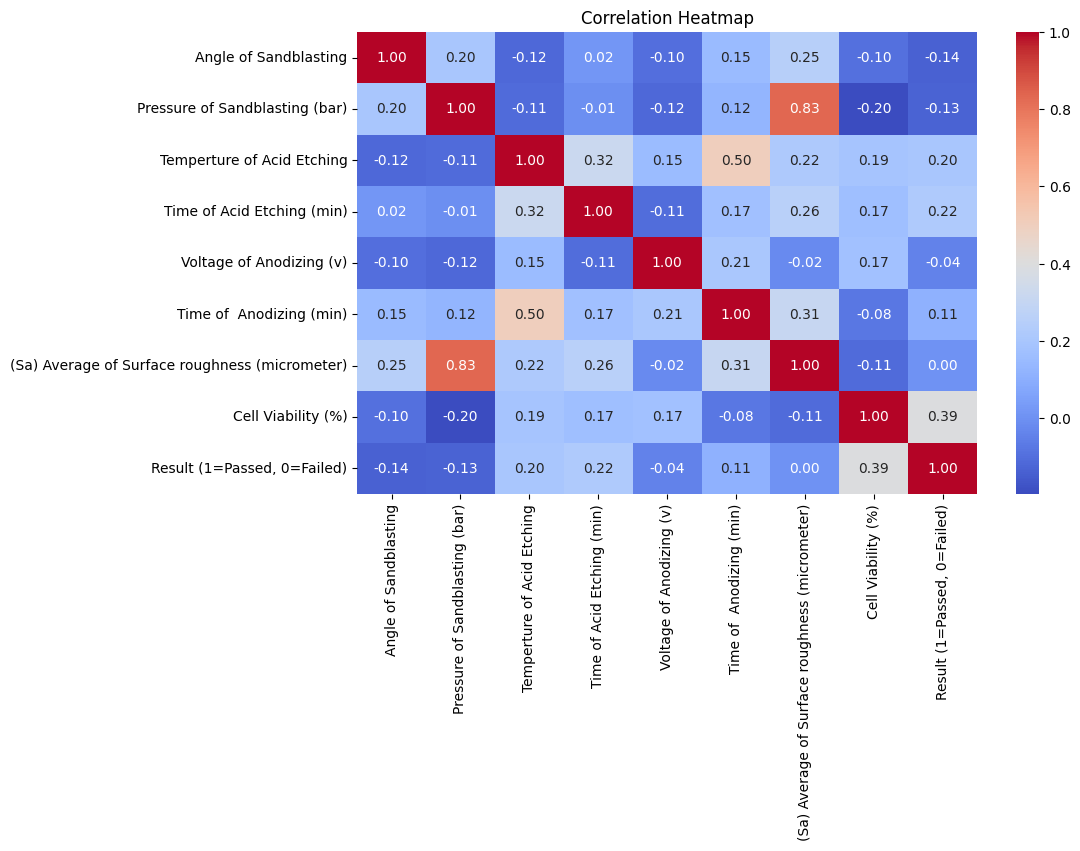

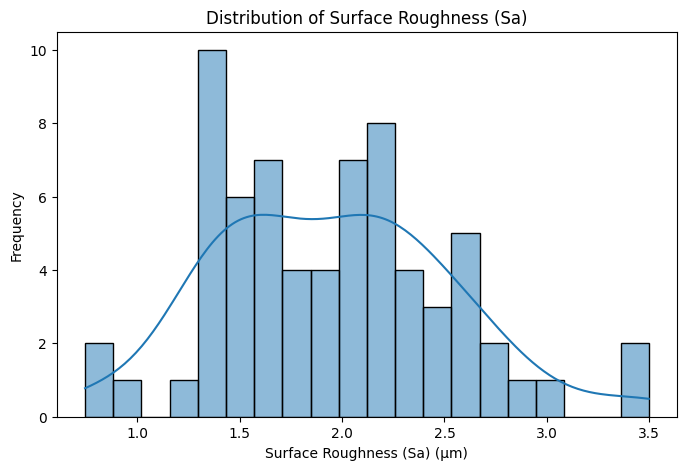

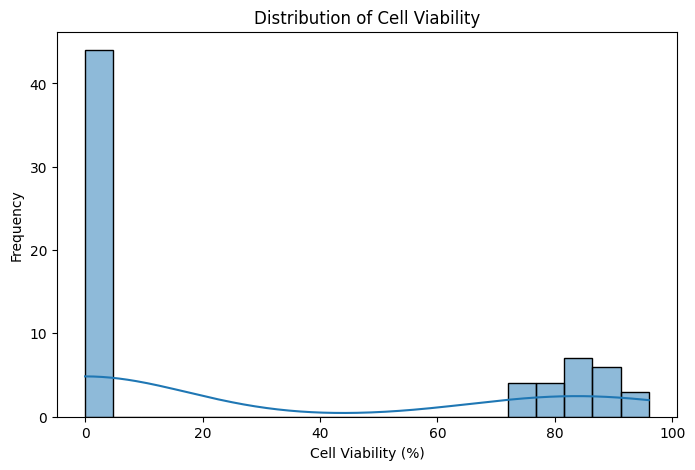

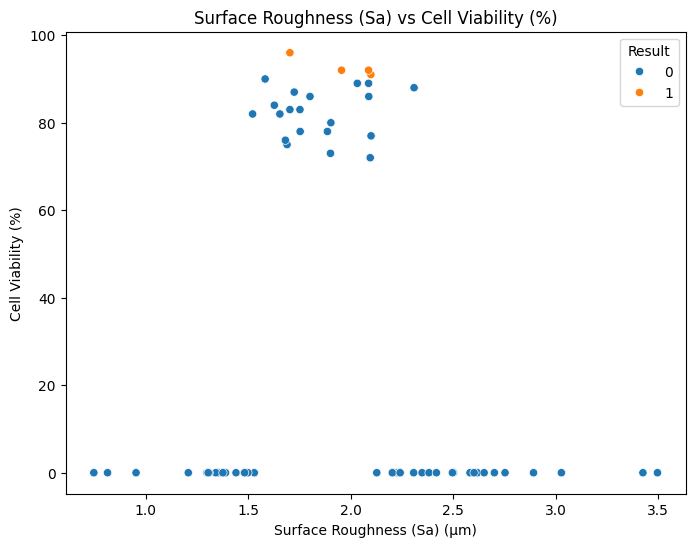

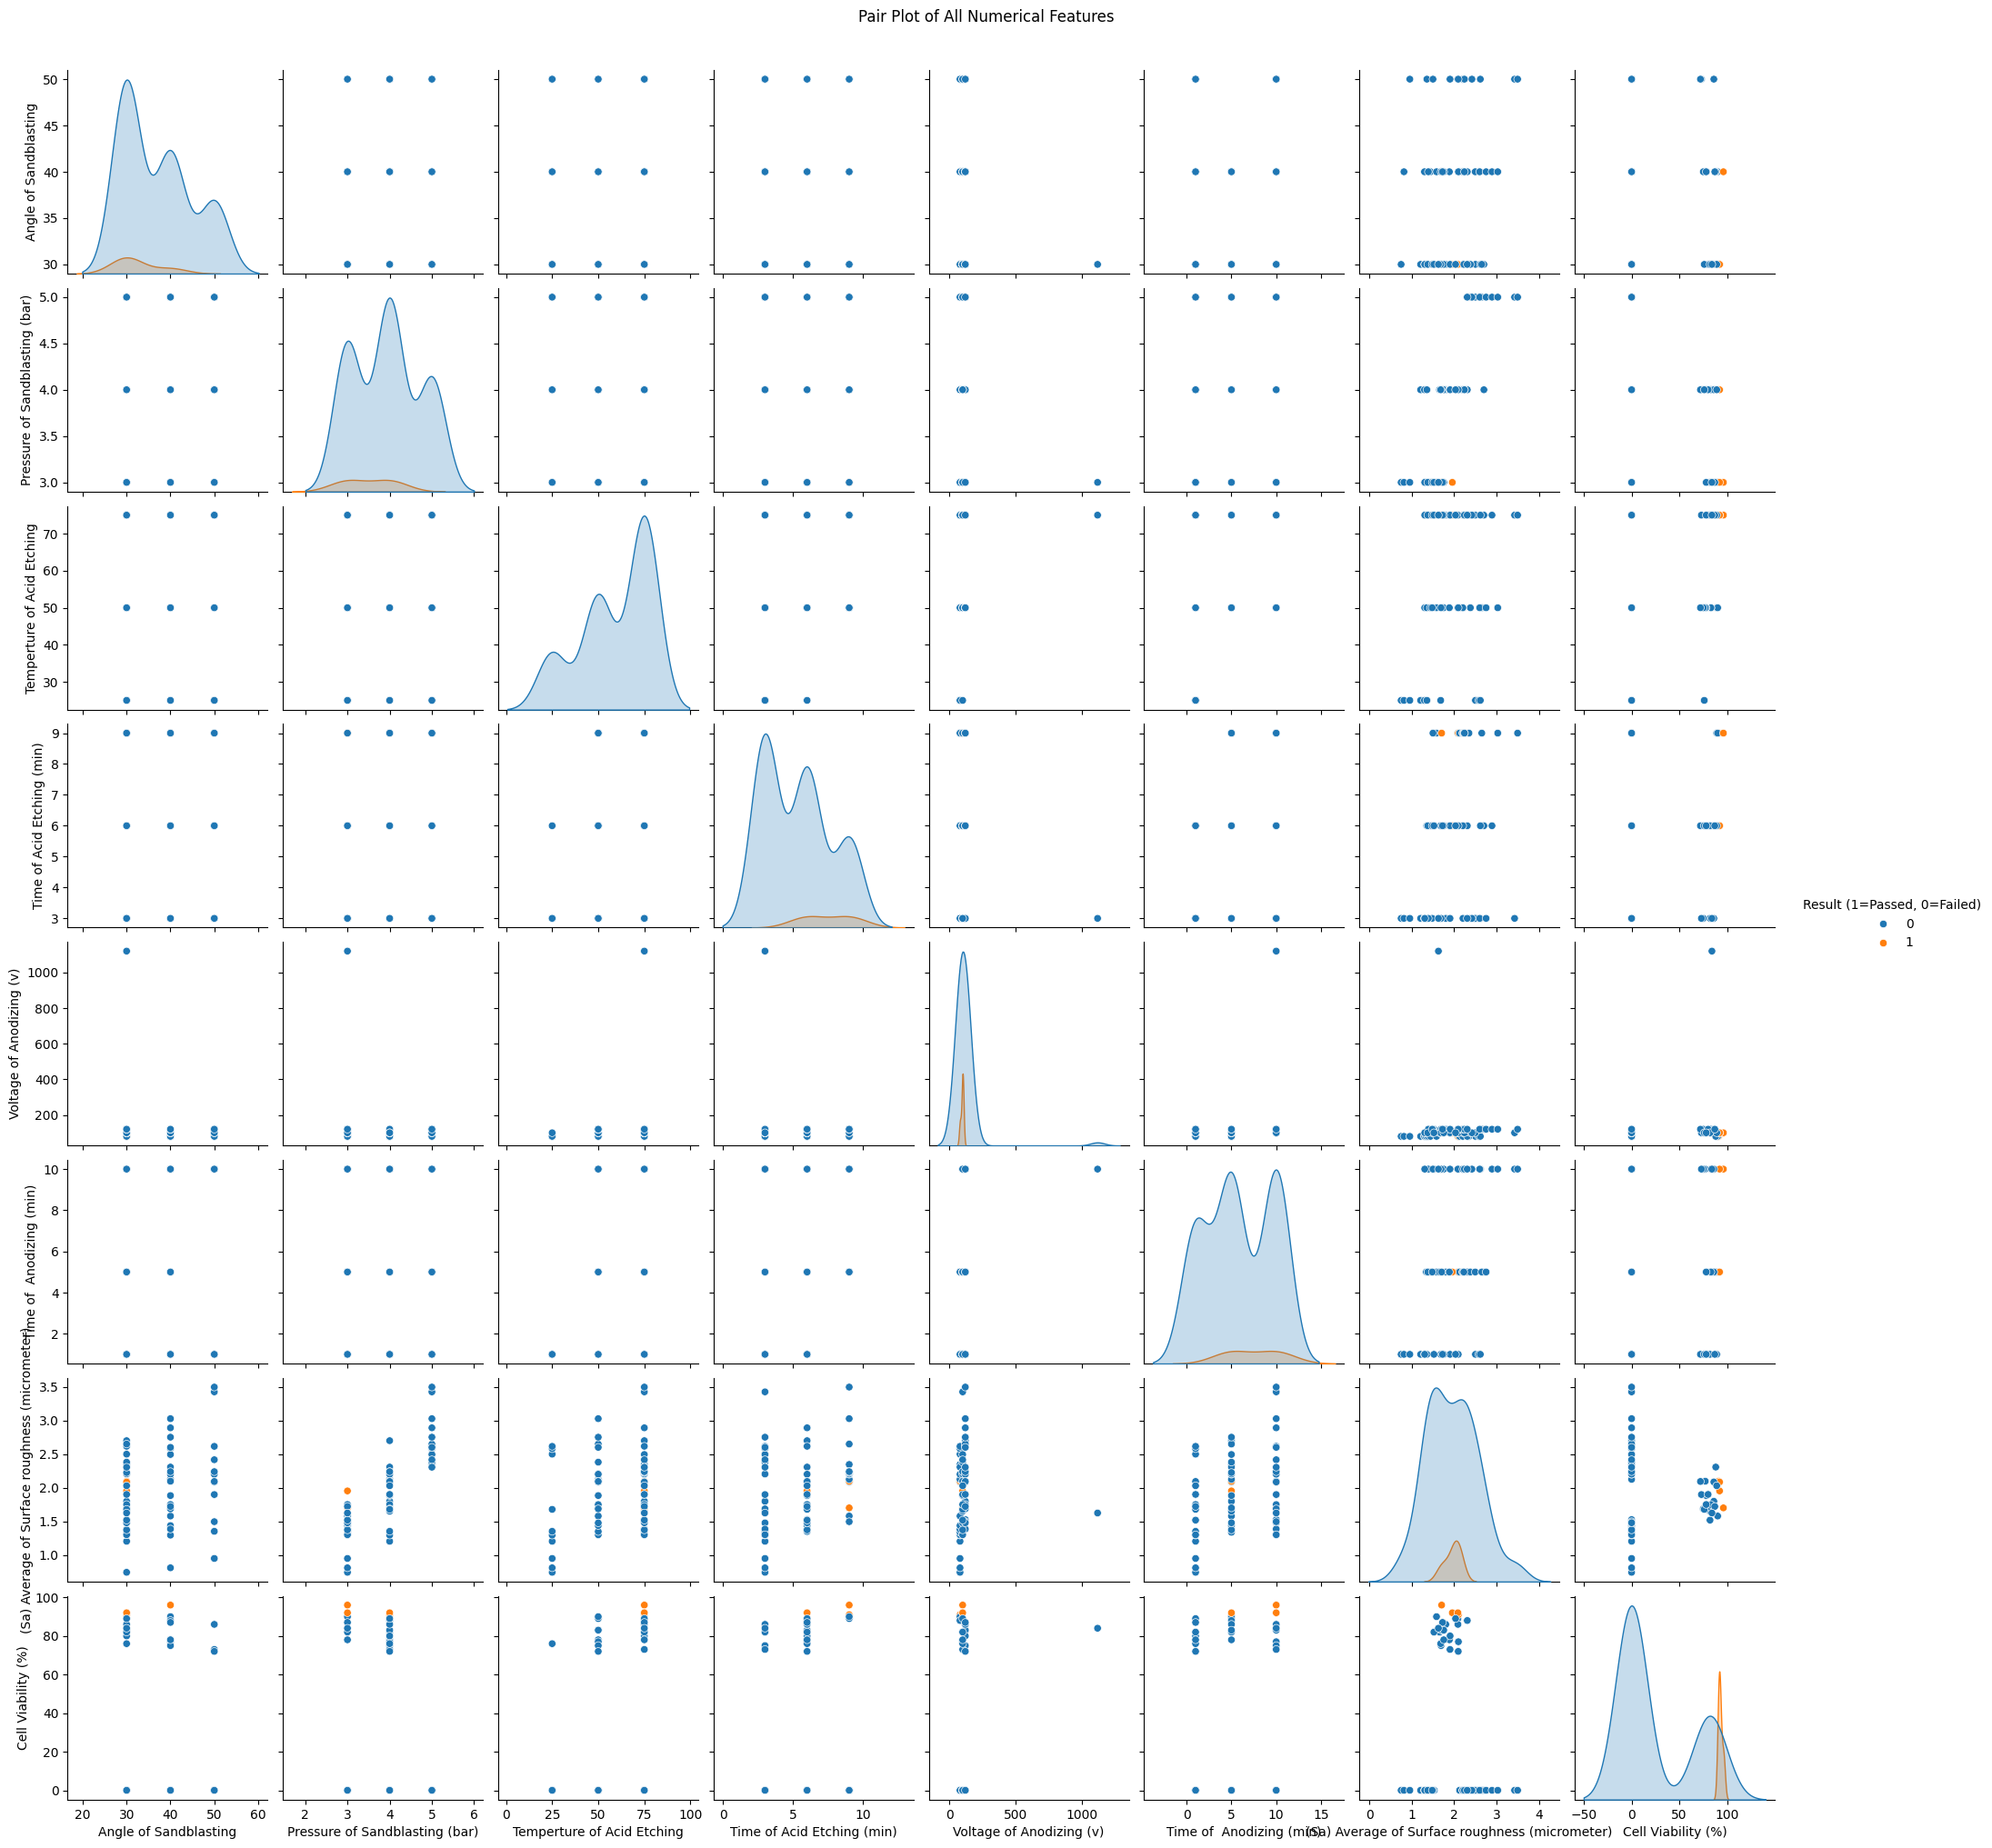

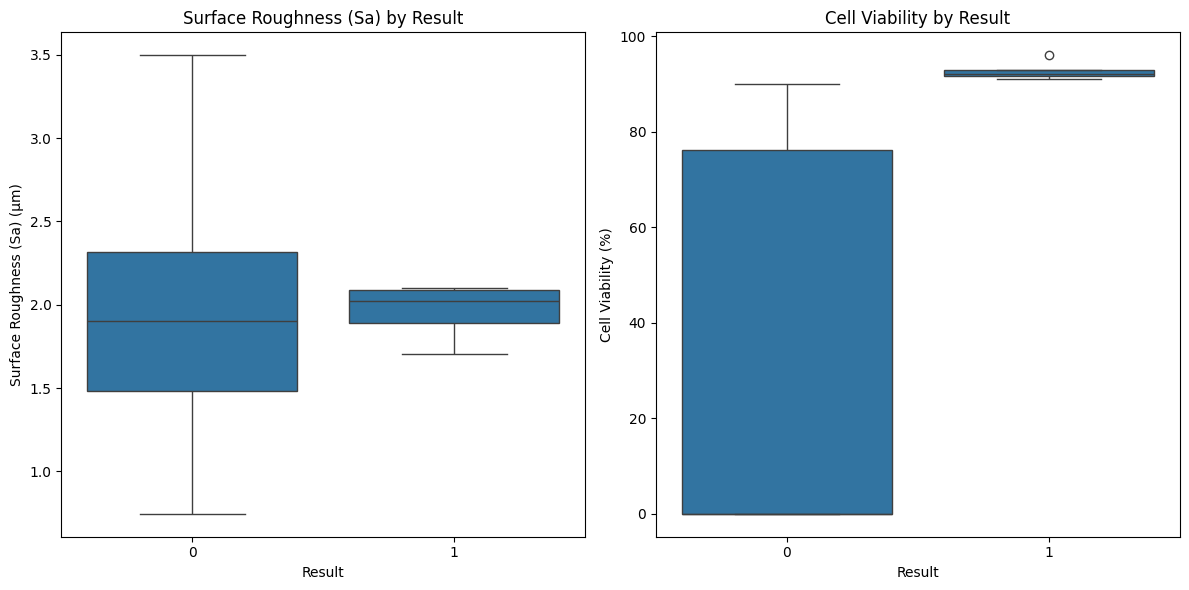

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Display first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Data shape
print(f"\nData shape: {data.shape}")

# Data types and basic info
print("\nData info:")
data.info()

# Summary statistics
print("\nSummary statistics:")
display(data.describe(include='all'))

# Check for missing values
print("\nMissing values by column:")
print(data.isnull().sum())

# Visualizations for EDA

# 1. Correlation Heatmap: Focus on Sa and Cell Viability
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 2. Distribution of Surface Roughness (Sa)
plt.figure(figsize=(8, 5))
sns.histplot(data['(Sa) Average of Surface roughness (micrometer)'], kde=True, bins=20)
plt.title("Distribution of Surface Roughness (Sa)")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel("Frequency")
plt.show()

# 3. Distribution of Cell Viability
plt.figure(figsize=(8, 5))
sns.histplot(data['Cell Viability (%)'], kde=True, bins=20)
plt.title("Distribution of Cell Viability")
plt.xlabel("Cell Viability (%)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Surface Roughness vs Cell Viability
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['(Sa) Average of Surface roughness (micrometer)'], y=data['Cell Viability (%)'], hue=data['Result (1=Passed, 0=Failed)'])
plt.title("Surface Roughness (Sa) vs Cell Viability (%)")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel("Cell Viability (%)")
plt.legend(title='Result')
plt.show()

# 5. Pair Plot: Exploring relationships between all numerical features
sns.pairplot(data, hue='Result (1=Passed, 0=Failed)')
plt.suptitle("Pair Plot of All Numerical Features", y=1.02)
plt.show()

# 6. Box Plot: Distribution of Surface Roughness and Cell Viability by Result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Result (1=Passed, 0=Failed)', y='(Sa) Average of Surface roughness (micrometer)', data=data)
plt.title("Surface Roughness (Sa) by Result")
plt.xlabel("Result")
plt.ylabel("Surface Roughness (Sa) (µm)")

plt.subplot(1, 2, 2)
sns.boxplot(x='Result (1=Passed, 0=Failed)', y='Cell Viability (%)', data=data)
plt.title("Cell Viability by Result")
plt.xlabel("Result")
plt.ylabel("Cell Viability (%)")

plt.tight_layout()
plt.show()

# 7. 3D Scatter Plot: Interactive exploration of the main variables
fig = px.scatter_3d(
    data, 
    x='Angle of Sandblasting', 
    y='Pressure of Sandblasting (bar)', 
    z='(Sa) Average of Surface roughness (micrometer)',
    color='Cell Viability (%)',
    title='3D Scatter Plot: Sandblasting Conditions vs Surface Roughness and Cell Viability'
)
fig.show()


### 3. Data Preprocessing
- The data preprocessing stage is crucial to ensure the quality and readiness of the data for model training. This includes handling missing values, normalizing or standardizing features, and splitting the data into training and testing sets.

Missing values:
 Angle of Sandblasting                             0
Pressure of Sandblasting (bar)                    0
Temperture of Acid Etching                        0
Time of Acid Etching (min)                        0
Voltage of Anodizing (v)                          0
Time of  Anodizing (min)                          0
(Sa) Average of Surface roughness (micrometer)    0
Cell Viability (%)                                0
Result (1=Passed, 0=Failed)                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           68 non-null     int64  
 1   Pressure of Sandblasting (bar)                  68 non-null     int64  
 2   Temperture of Acid Etching                      68 non-null     int64  
 3   Time of Ac

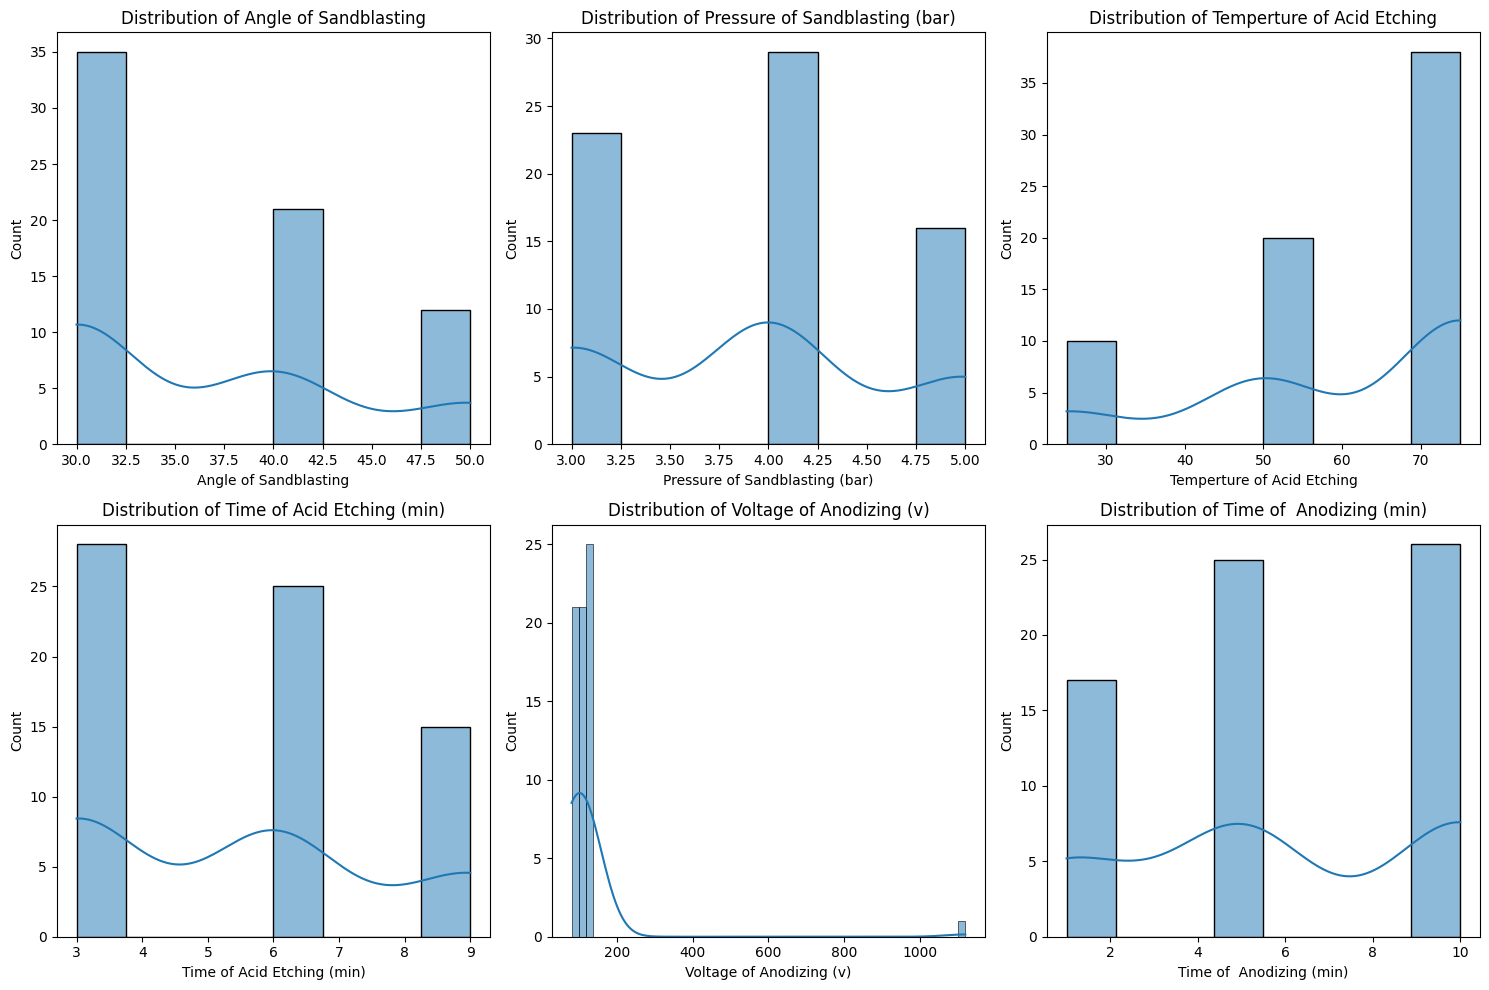

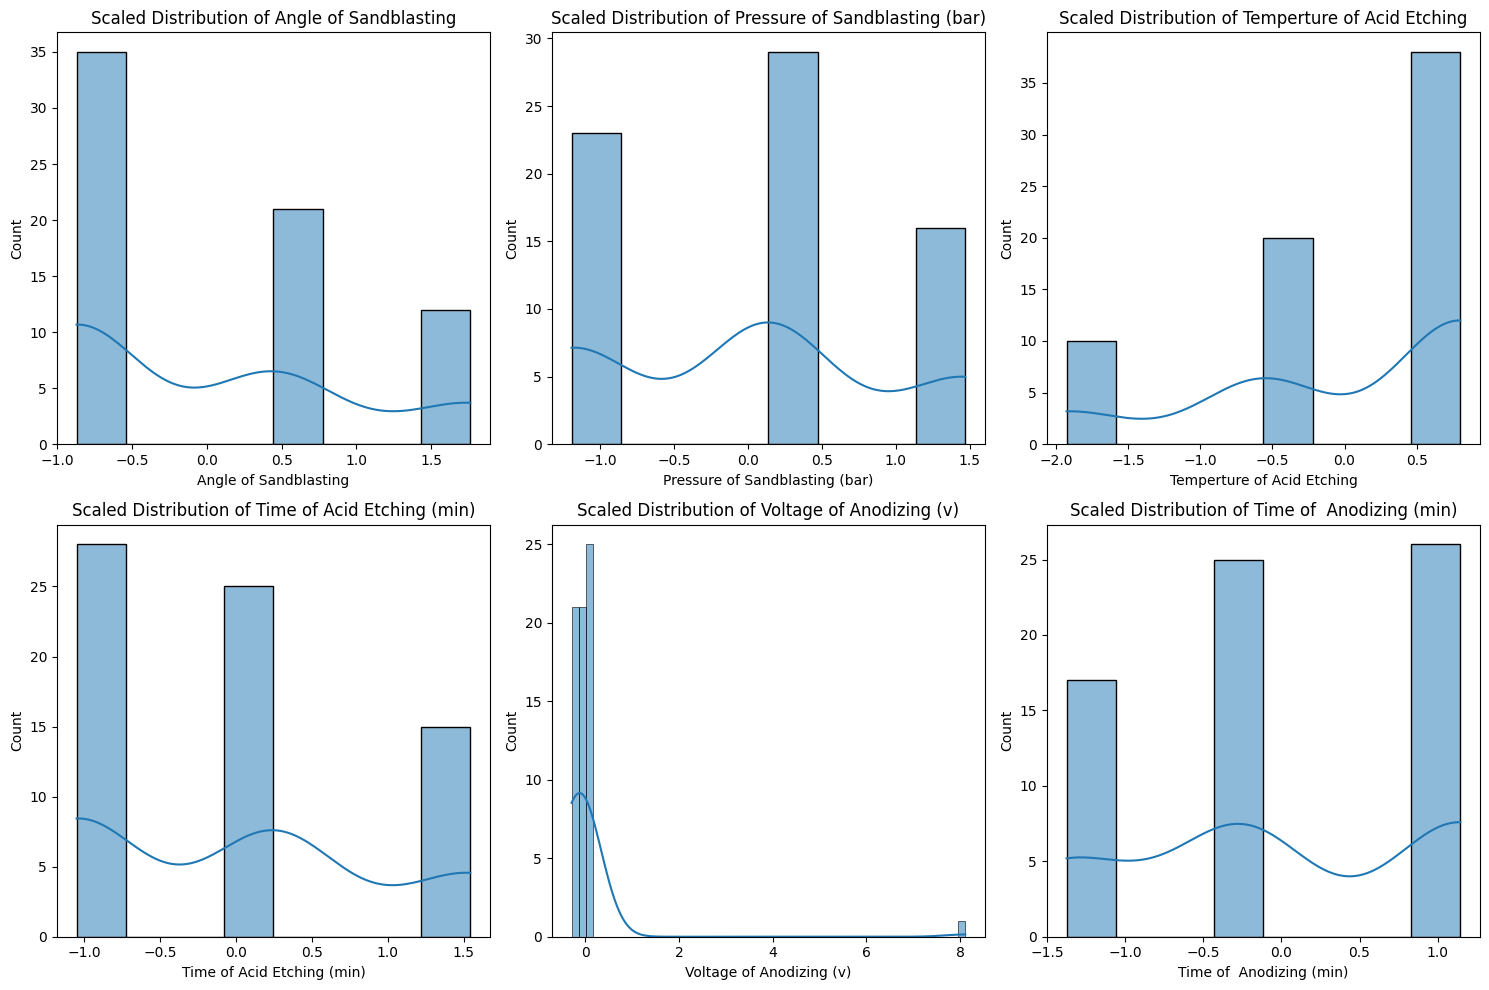

Training set size for Surface Roughness (Sa): (54, 6)
Testing set size for Surface Roughness (Sa): (14, 6)
Training set size for Cell Viability (CV): (54,)
Testing set size for Cell Viability (CV): (14,)


In [5]:
## Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Handle missing values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Instead of dropping, let's impute missing values
# Use mean for numeric columns (assuming all columns are numeric here)
data_imputed = data.fillna(data.mean())

# Verify if the data has been imputed correctly
print("Data after imputing missing values:\n", data_imputed.info())

# Ensure that the dataset is not empty after imputation
if data_imputed.empty:
    raise ValueError("Dataset is empty after imputing missing values.")

# Separate features and target variables
feature_columns = ['Angle of Sandblasting', 'Pressure of Sandblasting (bar)', 'Temperture of Acid Etching', 
                   'Time of Acid Etching (min)', 'Voltage of Anodizing (v)', 'Time of  Anodizing (min)']
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

# Ensure columns exist in the cleaned dataset
for column in feature_columns + [target_column_sa, target_column_cv]:
    if column not in data_imputed.columns:
        raise ValueError(f"Column {column} not found in dataset.")

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

print("Features (X):\n", X.head())
print("Target (y_sa):\n", y_sa.head())
print("Target (y_cv):\n", y_cv.head())

# Visualize distributions before scaling
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Normalize or standardize features
scaler = StandardScaler()

# Ensure that features are not empty and have valid shapes
if X.empty or X.shape[0] < 1 or X.shape[1] < 1:
    raise ValueError(f"Features are empty or have invalid shape: {X.shape}")

X_scaled = scaler.fit_transform(X)

# Visualize distributions after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_scaled_df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(X_scaled_df[column], kde=True)
    plt.title(f'Scaled Distribution of {column}')
plt.tight_layout()
plt.show()

# Split the data into training and testing sets for Surface Roughness (Sa) and Cell Viability (CV)
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_scaled, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_scaled, y_cv, test_size=0.2, random_state=42)

print("Training set size for Surface Roughness (Sa):", X_train.shape)
print("Testing set size for Surface Roughness (Sa):", X_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


### 4. Feature Engineering
- Creating new features from the existing ones to improve the performance of machine learning models. This can include interaction terms, polynomial features, and other derived metrics that may capture additional information

In [6]:
## Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset again to ensure we are working with the latest data
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Handle missing values
data_imputed = data.fillna(data.mean())

# Define feature and target columns
feature_columns = ['Angle of Sandblasting', 'Pressure of Sandblasting (bar)', 'Temperture of Acid Etching', 
                   'Time of Acid Etching (min)', 'Voltage of Anodizing (v)', 'Time of  Anodizing (min)']
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Ensure all features are numeric for PolynomialFeatures
numeric_features = feature_columns

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X[numeric_features])

# Get feature names
poly_feature_names = poly.get_feature_names_out(numeric_features)
print("Polynomial Feature Names:\n", poly_feature_names)

# Create a DataFrame with new features
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
print("Polynomial Features DataFrame:\n", X_poly_df.head())

# Normalize or standardize new features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_df)

# Split the data into training and testing sets for both targets
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_scaled, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_scaled, y_cv, test_size=0.2, random_state=42)

print("Training set size after feature engineering:", X_train.shape)
print("Testing set size after feature engineering:", X_test.shape)
print("Training set size for Surface Roughness (Sa):", y_sa_train.shape)
print("Testing set size for Surface Roughness (Sa):", y_sa_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


Polynomial Feature Names:
 ['Angle of Sandblasting' 'Pressure of Sandblasting (bar)'
 'Temperture of Acid Etching' 'Time of Acid Etching (min)'
 'Voltage of Anodizing (v)' 'Time of  Anodizing (min)'
 'Angle of Sandblasting^2'
 'Angle of Sandblasting Pressure of Sandblasting (bar)'
 'Angle of Sandblasting Temperture of Acid Etching'
 'Angle of Sandblasting Time of Acid Etching (min)'
 'Angle of Sandblasting Voltage of Anodizing (v)'
 'Angle of Sandblasting Time of  Anodizing (min)'
 'Pressure of Sandblasting (bar)^2'
 'Pressure of Sandblasting (bar) Temperture of Acid Etching'
 'Pressure of Sandblasting (bar) Time of Acid Etching (min)'
 'Pressure of Sandblasting (bar) Voltage of Anodizing (v)'
 'Pressure of Sandblasting (bar) Time of  Anodizing (min)'
 'Temperture of Acid Etching^2'
 'Temperture of Acid Etching Time of Acid Etching (min)'
 'Temperture of Acid Etching Voltage of Anodizing (v)'
 'Temperture of Acid Etching Time of  Anodizing (min)'
 'Time of Acid Etching (min)^2'
 'Time 

### 5. Model Training
- To identify the best model for predicting optimal sandblasting conditions for dental implants, we will experiment with various machine learning models. This includes Linear Regression, Random Forest, Gradient Boosting, and Neural Networks .

Training Linear Regression...
Linear Regression - MAE (Sa): 0.2536, MAE (CV): 45.1338
Training Random Forest...
Random Forest - MAE (Sa): 0.2173, MAE (CV): 30.7870
Training Gradient Boosting...
Gradient Boosting - MAE (Sa): 0.2237, MAE (CV): 29.1931
Training Neural Network...
Neural Network - MAE (Sa): 0.4102, MAE (CV): 31.0765
Training SVR...
SVR - MAE (Sa): 0.2344, MAE (CV): 30.1638
Training XGBoost...
XGBoost - MAE (Sa): 0.2322, MAE (CV): 32.0250

Model Performance:
                    MAE (Sa)   MAE (CV)
Linear Regression  0.253609  45.133806
Random Forest      0.217316  30.786964
Gradient Boosting  0.223674  29.193084
Neural Network     0.410233  31.076530
SVR                0.234440  30.163782
XGBoost            0.232179  32.025015

Best Model for Surface Roughness (Sa): Random Forest
Test MAE (Sa): 0.2407
Test RMSE (Sa): 0.3192
Test R2 (Sa): 0.7134

Best Model for Cell Viability (CV): Gradient Boosting
Test MAE (CV): 28.4114
Test RMSE (CV): 43.8148
Test R2 (CV): -0.2483


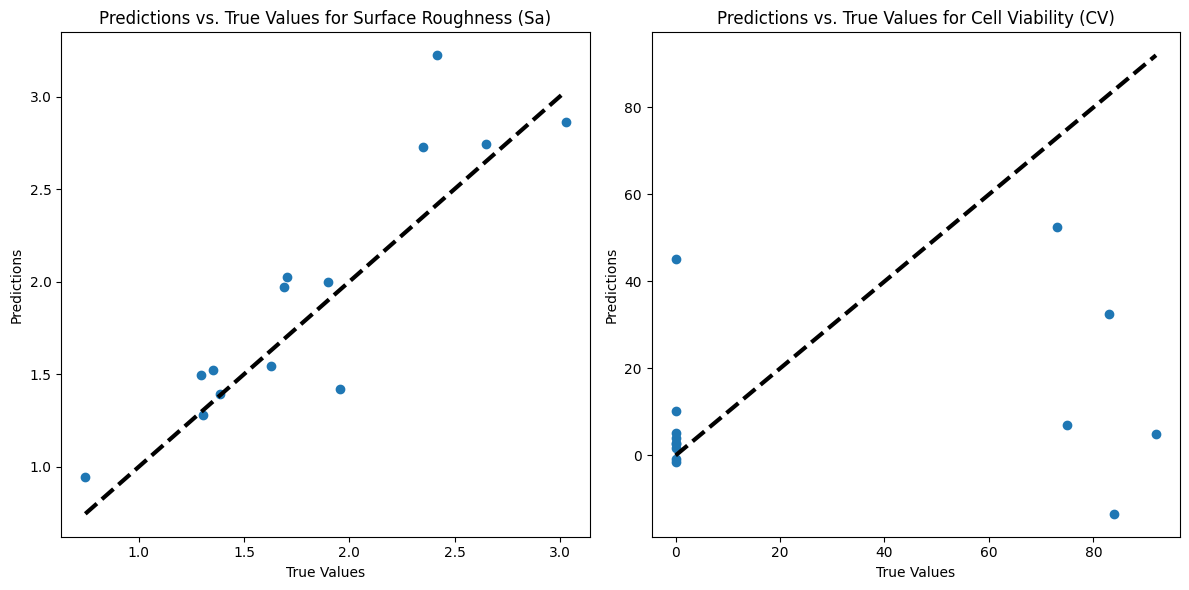

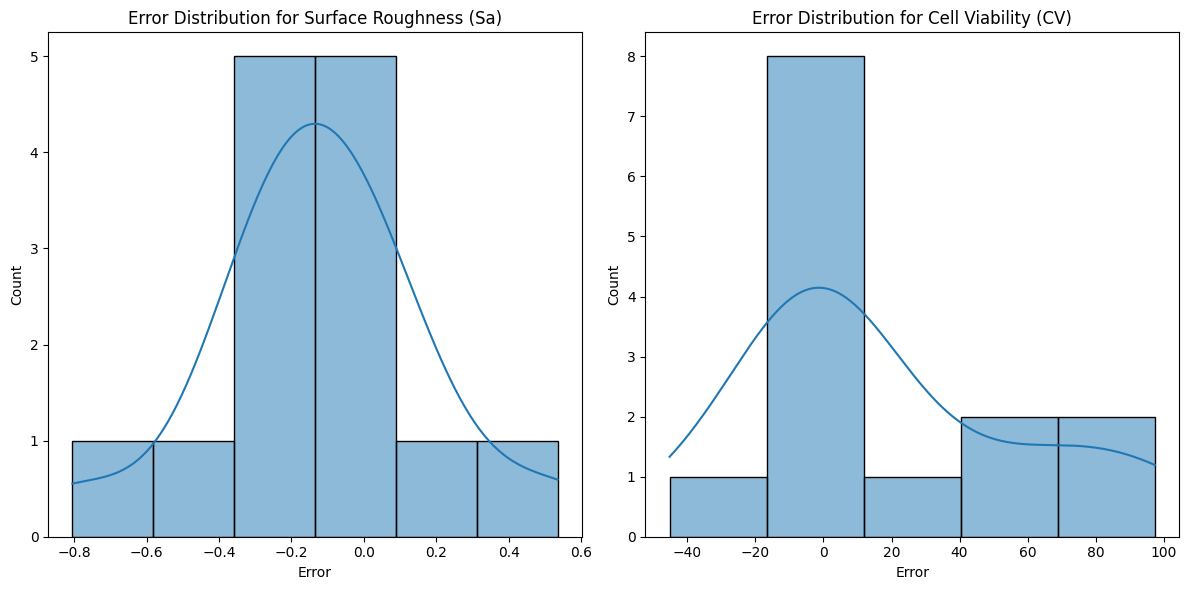

In [7]:
## Model Training 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models with adjusted parameters for MLPRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=2000, learning_rate_init=0.001, random_state=42, early_stopping=True),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42)
}

# Initialize dictionary to store model performance
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Cross-validation for Surface Roughness (Sa)
    cv_scores_sa = cross_val_score(model, X_train, y_sa_train, cv=5, scoring='neg_mean_absolute_error')
    mae_sa = -cv_scores_sa.mean()
    
    # Cross-validation for Cell Viability (CV)
    cv_scores_cv = cross_val_score(model, X_train, y_cv_train, cv=5, scoring='neg_mean_absolute_error')
    mae_cv = -cv_scores_cv.mean()
    
    # Store results
    model_performance[model_name] = {
        "MAE (Sa)": mae_sa,
        "MAE (CV)": mae_cv
    }
    
    print(f"{model_name} - MAE (Sa): {mae_sa:.4f}, MAE (CV): {mae_cv:.4f}")

# Convert performance to DataFrame
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance:\n", performance_df)

# Train the best model for Surface Roughness (Sa) on the entire training set and evaluate on the test set
best_model_name_sa = performance_df['MAE (Sa)'].idxmin()
best_model_sa = models[best_model_name_sa]
best_model_sa.fit(X_train, y_sa_train)
y_sa_pred = best_model_sa.predict(X_test)

# Evaluate the best model for Surface Roughness (Sa) on the test set
test_mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
test_rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
test_r2_sa = r2_score(y_sa_test, y_sa_pred)

print(f"\nBest Model for Surface Roughness (Sa): {best_model_name_sa}")
print(f"Test MAE (Sa): {test_mae_sa:.4f}")
print(f"Test RMSE (Sa): {test_rmse_sa:.4f}")
print(f"Test R2 (Sa): {test_r2_sa:.4f}")

# Train the best model for Cell Viability (CV) on the entire training set and evaluate on the test set
best_model_name_cv = performance_df['MAE (CV)'].idxmin()
best_model_cv = models[best_model_name_cv]
best_model_cv.fit(X_train, y_cv_train)
y_cv_pred = best_model_cv.predict(X_test)

# Evaluate the best model for Cell Viability (CV) on the test set
test_mae_cv = mean_absolute_error(y_cv_test, y_cv_pred)
test_rmse_cv = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred))
test_r2_cv = r2_score(y_cv_test, y_cv_pred)

print(f"\nBest Model for Cell Viability (CV): {best_model_name_cv}")
print(f"Test MAE (CV): {test_mae_cv:.4f}")
print(f"Test RMSE (CV): {test_rmse_cv:.4f}")
print(f"Test R2 (CV): {test_r2_cv:.4f}")

# Visualizations

# Learning Curve for Neural Network
if 'Neural Network' in models:
    nn_model = models['Neural Network']
    if hasattr(nn_model, 'loss_curve_'):
        plt.figure(figsize=(10, 5))
        plt.plot(nn_model.loss_curve_)
        plt.title("Learning Curve for Neural Network")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

# Predictions vs. True Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred)
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred)
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred, kde=True)
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred, kde=True)
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


### 6.Hyperparameter Tuning : 
- Hyperparameter tuning aims to find the best set of hyperparameters for a machine learning model to optimize its performance. Here’s how to perform hyperparameter tuning for the Random Forest and Gradient Boosting models.

Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Tuning Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Tuning SVR...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Tuning XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Random Forest - Test MAE (Sa): 0.2523
Random Forest - Test RMSE (Sa): 0.2986
Random Forest - Test R2 (Sa): 0.7492
Gradient Boosting - Test MAE (Sa): 0.2419
Gradient Boosting - Test RMSE (Sa): 0.3034
Gradient Boosting - Test R2 (Sa): 0.7412
SVR - Test 

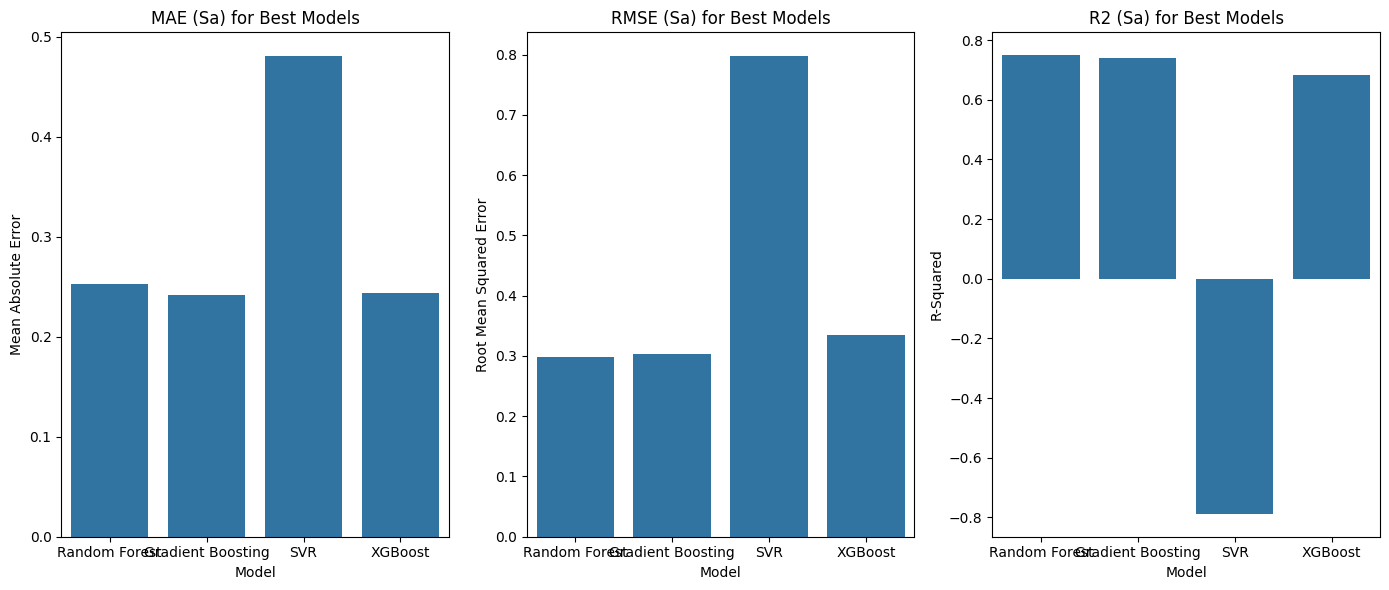

In [8]:
## Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for each model
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_svr,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV for each model
print("Tuning Random Forest...")
grid_search_rf.fit(X_train, y_sa_train)
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

print("Tuning Gradient Boosting...")
grid_search_gb.fit(X_train, y_sa_train)
best_gb = grid_search_gb.best_estimator_
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)

print("Tuning SVR...")
grid_search_svr.fit(X_train, y_sa_train)
best_svr = grid_search_svr.best_estimator_
print("Best parameters for SVR:", grid_search_svr.best_params_)

print("Tuning XGBoost...")
grid_search_xgb.fit(X_train, y_sa_train)
best_xgb = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluate the best models on the test set
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

performance_metrics = {}

for model_name, model in models.items():
    y_sa_pred = model.predict(X_test)
    mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
    rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
    r2_sa = r2_score(y_sa_test, y_sa_pred)

    performance_metrics[model_name] = {
        "MAE (Sa)": mae_sa,
        "RMSE (Sa)": rmse_sa,
        "R2 (Sa)": r2_sa
    }

    print(f"{model_name} - Test MAE (Sa): {mae_sa:.4f}")
    print(f"{model_name} - Test RMSE (Sa): {rmse_sa:.4f}")
    print(f"{model_name} - Test R2 (Sa): {r2_sa:.4f}")

# Documenting best hyperparameters and performance
best_hyperparameters = {
    "Random Forest": grid_search_rf.best_params_,
    "Gradient Boosting": grid_search_gb.best_params_,
    "SVR": grid_search_svr.best_params_,
    "XGBoost": grid_search_xgb.best_params_,
}

print("\nBest Hyperparameters:\n", best_hyperparameters)
print("\nPerformance Metrics:\n", performance_metrics)

# Visualizations

# Plot performance metrics for all tuned models
metrics_df = pd.DataFrame(performance_metrics).T

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=metrics_df.index, y=[metrics_df['MAE (Sa)'][model] for model in metrics_df.index])
plt.title('MAE (Sa) for Best Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')

plt.subplot(1, 3, 2)
sns.barplot(x=metrics_df.index, y=[metrics_df['RMSE (Sa)'][model] for model in metrics_df.index])
plt.title('RMSE (Sa) for Best Models')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model')

plt.subplot(1, 3, 3)
sns.barplot(x=metrics_df.index, y=[metrics_df['R2 (Sa)'][model] for model in metrics_df.index])
plt.title('R2 (Sa) for Best Models')
plt.ylabel('R-Squared')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


### 7. Model Evaluation :
- To evaluate the best model (Gradient Boosting in this case) for predicting Surface Roughness (Sa) and Cell Viability.

Gradient Boosting - Test MAE (Sa): 0.2419
Gradient Boosting - Test RMSE (Sa): 0.3034
Gradient Boosting - Test R2 (Sa): 0.7412


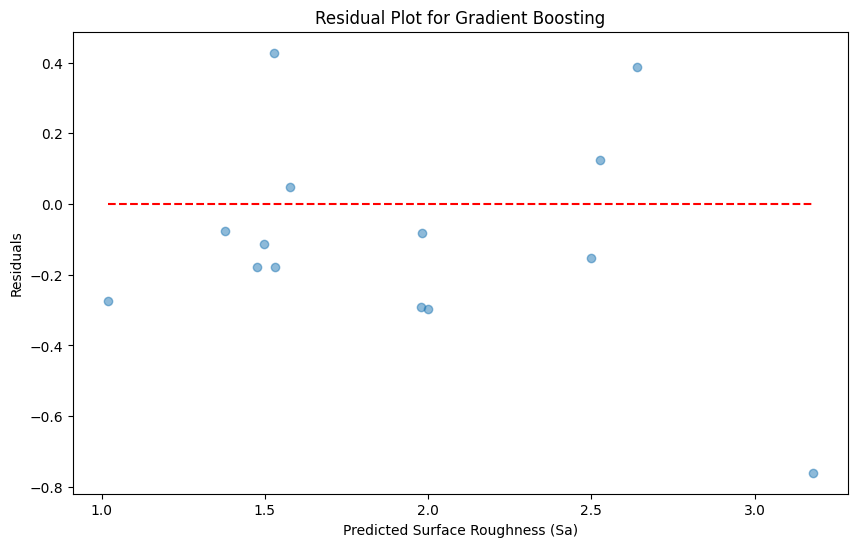

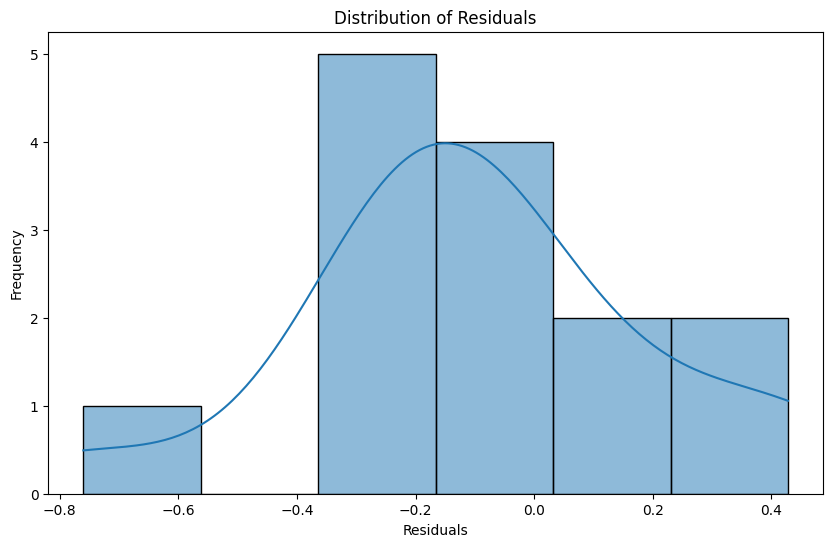

Gradient Boosting - Test MAE (CV): 67.0000
Gradient Boosting - Test RMSE (CV): 73.4756
Gradient Boosting - Test R2 (CV): -4.6287


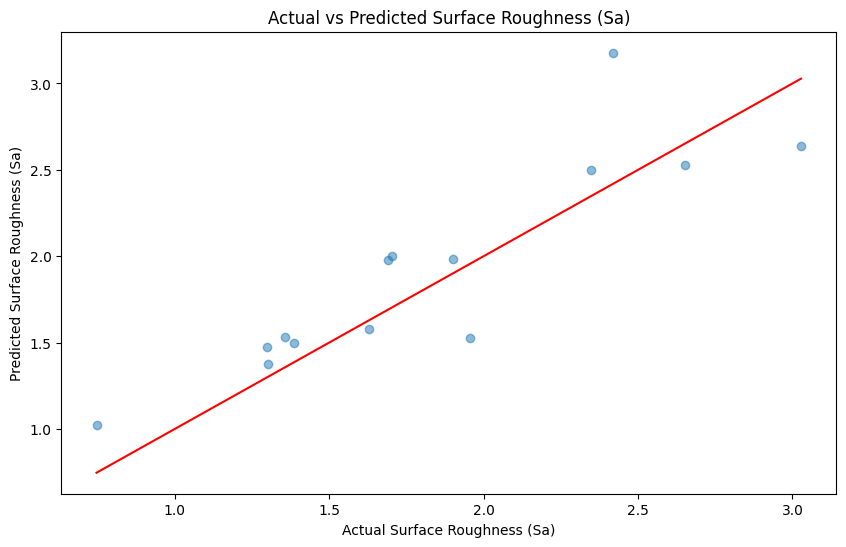

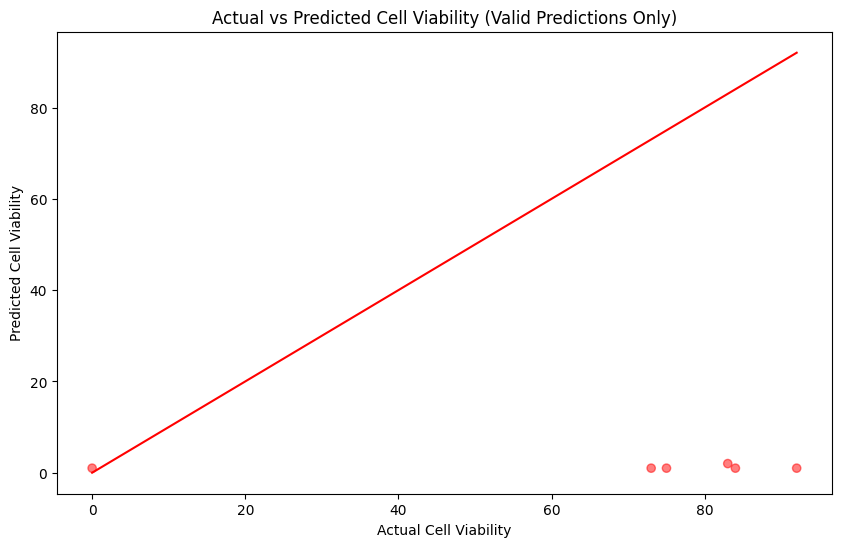

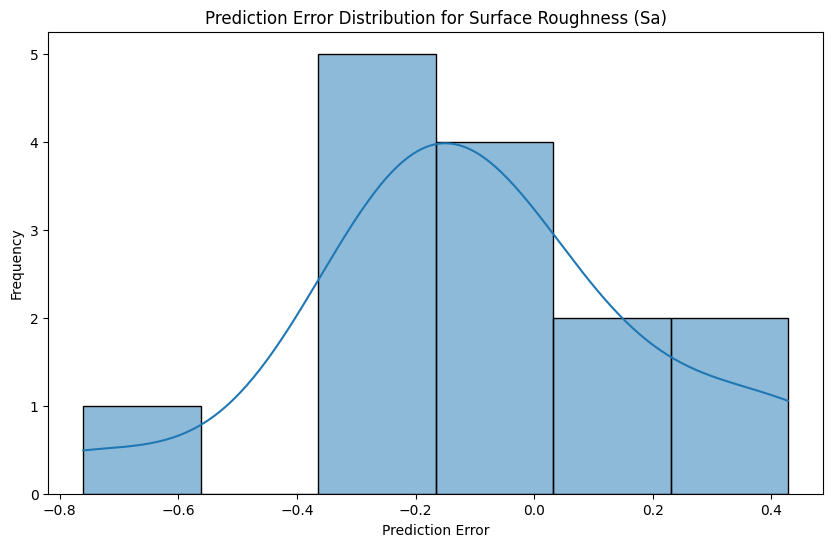

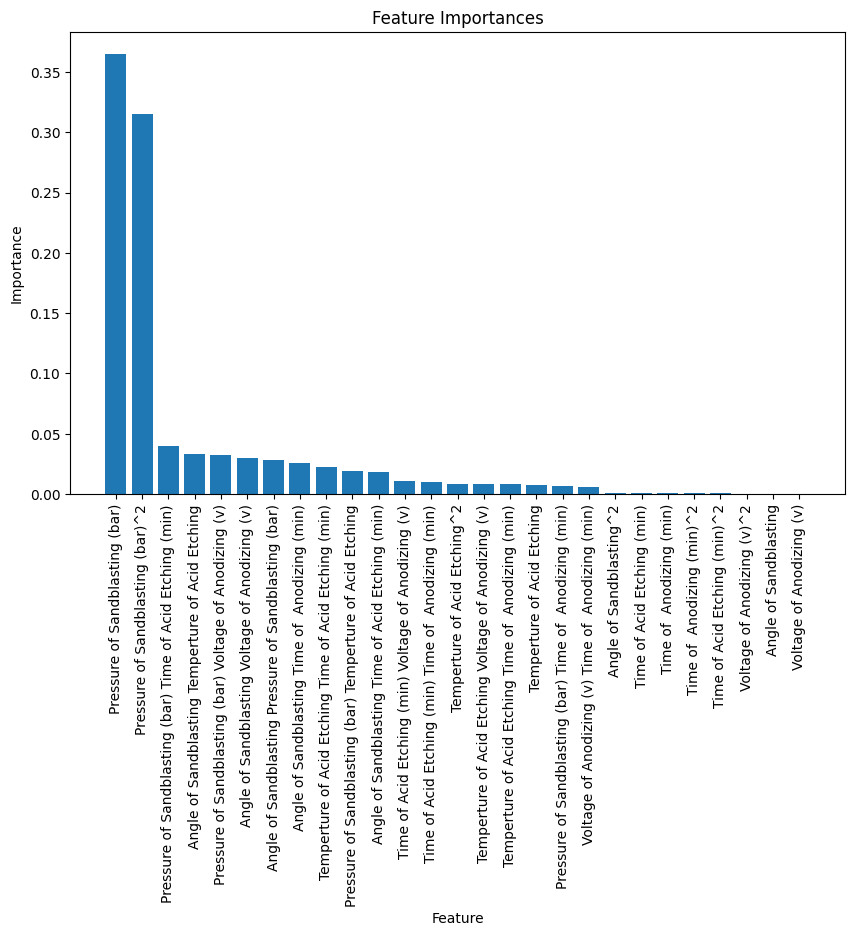

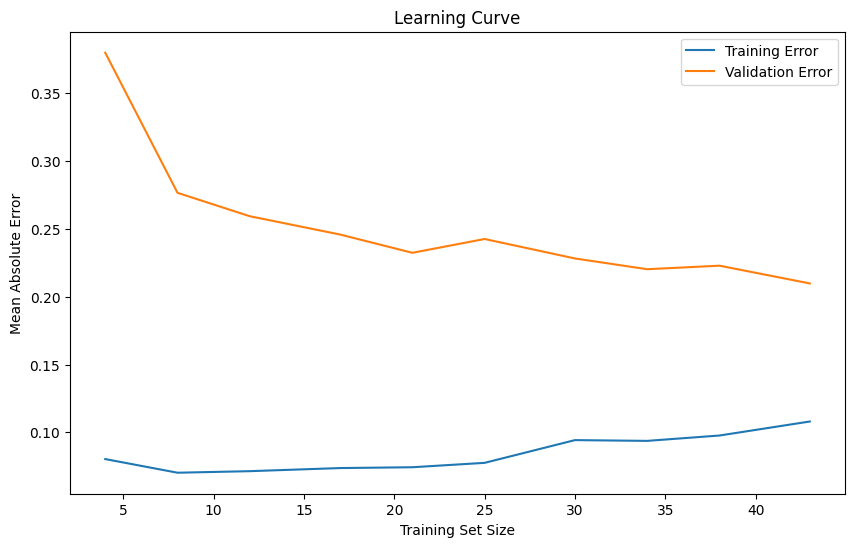

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import pandas as pd

# Best model is Gradient Boosting based on earlier results
best_model = best_gb

# Predictions on the test set for Surface Roughness
y_sa_pred = best_model.predict(X_test)

# Apply Surface Roughness Rule: Only make Cell Viability predictions if 1.5 < Sa < 2.5
valid_indices = (y_sa_pred > 1.5) & (y_sa_pred < 2.5)

# Initialize Cell Viability predictions as zeros for all, then update only valid indices
y_cv_pred = np.zeros_like(y_cv_test)
if any(valid_indices):
    y_cv_pred[valid_indices] = best_model.predict(X_test[valid_indices])

# Evaluation metrics for Surface Roughness (Sa)
mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
r2_sa = r2_score(y_sa_test, y_sa_pred)

print(f"Gradient Boosting - Test MAE (Sa): {mae_sa:.4f}")
print(f"Gradient Boosting - Test RMSE (Sa): {rmse_sa:.4f}")
print(f"Gradient Boosting - Test R2 (Sa): {r2_sa:.4f}")

# Residuals
residuals = y_sa_test - y_sa_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_sa_pred), xmax=max(y_sa_pred), color='r', linestyles='dashed')
plt.xlabel('Predicted Surface Roughness (Sa)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gradient Boosting')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Evaluate Cell Viability (CV) for valid indices only
mae_cv = mean_absolute_error(y_cv_test[valid_indices], y_cv_pred[valid_indices])
rmse_cv = np.sqrt(mean_squared_error(y_cv_test[valid_indices], y_cv_pred[valid_indices]))
r2_cv = r2_score(y_cv_test[valid_indices], y_cv_pred[valid_indices])

print(f"Gradient Boosting - Test MAE (CV): {mae_cv:.4f}")
print(f"Gradient Boosting - Test RMSE (CV): {rmse_cv:.4f}")
print(f"Gradient Boosting - Test R2 (CV): {r2_cv:.4f}")

# Color coding for Cell Viability based on validity
valid_colors = np.where(y_cv_pred[valid_indices] > 90, 'green', 'red')

# Scatter plot of actual vs. predicted values for Surface Roughness
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_test, y_sa_pred, alpha=0.5)
plt.plot([min(y_sa_test), max(y_sa_test)], [min(y_sa_test), max(y_sa_test)], color='r')
plt.xlabel('Actual Surface Roughness (Sa)')
plt.ylabel('Predicted Surface Roughness (Sa)')
plt.title('Actual vs Predicted Surface Roughness (Sa)')
plt.show()

# Scatter plot of actual vs. predicted values for Cell Viability (valid predictions only)
plt.figure(figsize=(10, 6))
plt.scatter(y_cv_test[valid_indices], y_cv_pred[valid_indices], alpha=0.5, c=valid_colors)
plt.plot([min(y_cv_test[valid_indices]), max(y_cv_test[valid_indices])], [min(y_cv_test[valid_indices]), max(y_cv_test[valid_indices])], color='r')
plt.xlabel('Actual Cell Viability')
plt.ylabel('Predicted Cell Viability')
plt.title('Actual vs Predicted Cell Viability (Valid Predictions Only)')
plt.show()

# Additional Visualizations

# Prediction Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_sa_test - y_sa_pred, kde=True)
plt.title('Prediction Error Distribution for Surface Roughness (Sa)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Feature Importance for Gradient Boosting
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), poly_feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_sa_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


### Predictions  :
- Surface Roughness and Cell Viability directly in the prediction function.

    Predicted Surface Roughness (Sa)  Predicted Cell Viability (%) Validity
0                           1.979066                      1.979066      red
1                           2.500159                      0.000000      red
2                           1.475741                      0.000000      red
3                           1.378237                      0.000000      red
4                           1.526936                      1.526936      red
5                           2.000427                      2.000427      red
6                           1.577470                      1.577470      red
7                           1.532470                      1.532470      red
8                           2.527606                      0.000000      red
9                           1.497421                      0.000000      red
10                          3.178127                      0.000000      red
11                          2.639783                      0.000000      red
12          

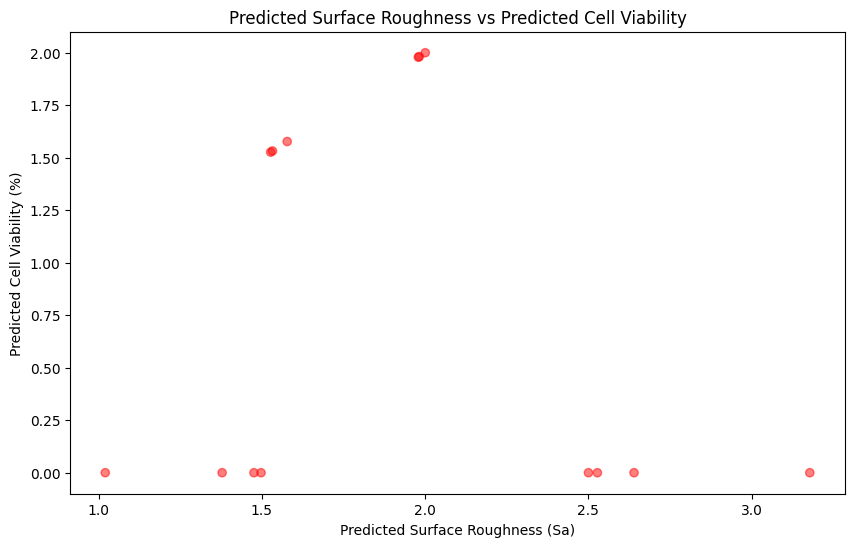

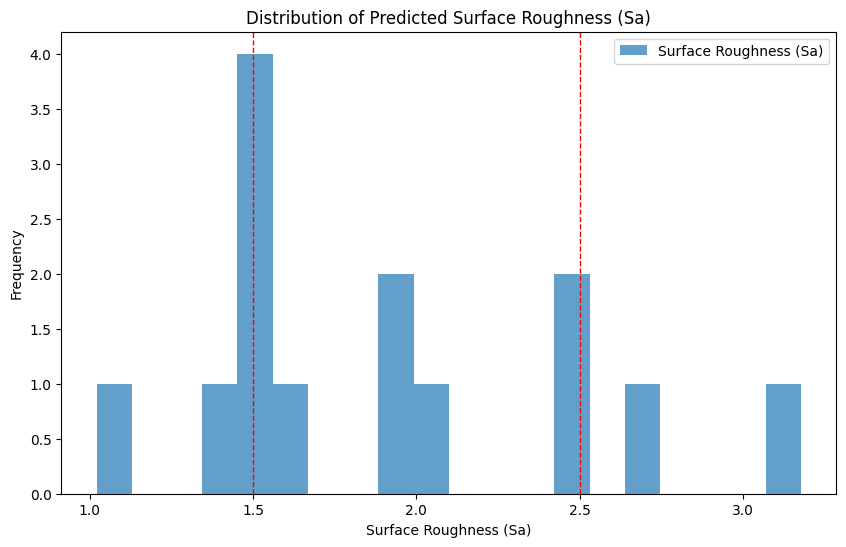

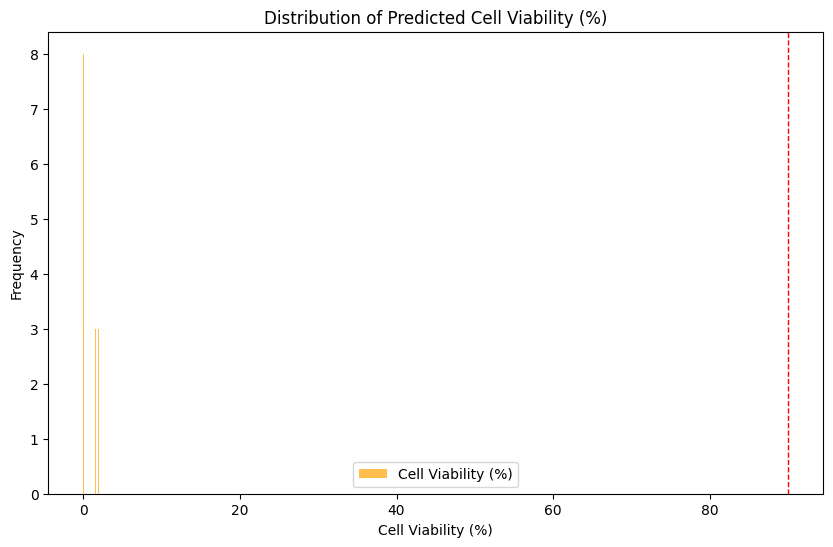

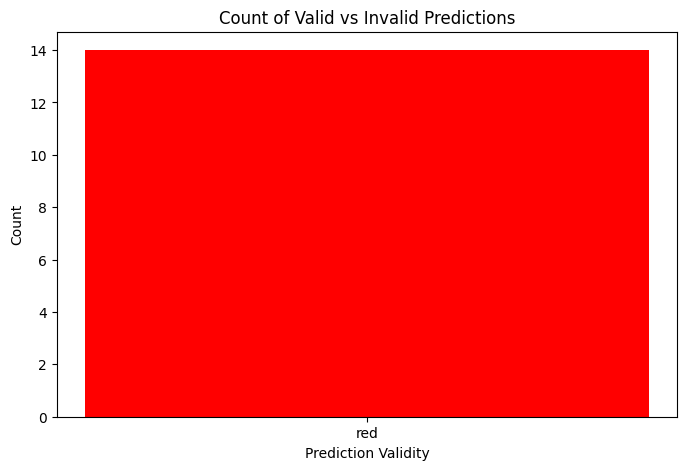

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to make predictions with validation rules
def make_predictions(X_new):
    y_sa_pred_new = best_model.predict(X_new)
    
    # Initialize Cell Viability predictions as zeros
    y_cv_pred_new = np.zeros(len(y_sa_pred_new))
    
    # Apply Surface Roughness Rule
    valid_indices_new = (y_sa_pred_new > 1.5) & (y_sa_pred_new < 2.5)
    
    if any(valid_indices_new):
        # Predict Cell Viability only for valid Surface Roughness predictions
        y_cv_pred_new[valid_indices_new] = best_model.predict(X_new[valid_indices_new])
    
    # Apply Cell Viability Rule for color coding
    color_codes = np.where(y_cv_pred_new > 90, 'green', 'red')
    
    return y_sa_pred_new, y_cv_pred_new, color_codes

# Example usage with new data
X_new = X_test  # Replace with new data
y_sa_pred_new, y_cv_pred_new, color_codes = make_predictions(X_new)

# Display predictions with color coding
results = pd.DataFrame({
    'Predicted Surface Roughness (Sa)': y_sa_pred_new,
    'Predicted Cell Viability (%)': y_cv_pred_new,
    'Validity': color_codes
})
print(results)

# Visualizations for Predictions

# Scatter plot of predicted Surface Roughness vs Cell Viability
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_pred_new, y_cv_pred_new, c=color_codes, alpha=0.5)
plt.xlabel('Predicted Surface Roughness (Sa)')
plt.ylabel('Predicted Cell Viability (%)')
plt.title('Predicted Surface Roughness vs Predicted Cell Viability')
plt.show()

# Histograms of predictions
plt.figure(figsize=(10, 6))
plt.hist(y_sa_pred_new, bins=20, alpha=0.7, label='Surface Roughness (Sa)')
plt.axvline(1.5, color='r', linestyle='dashed', linewidth=1)
plt.axvline(2.5, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribution of Predicted Surface Roughness (Sa)')
plt.xlabel('Surface Roughness (Sa)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(y_cv_pred_new, bins=20, alpha=0.7, label='Cell Viability (%)', color='orange')
plt.axvline(90, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribution of Predicted Cell Viability (%)')
plt.xlabel('Cell Viability (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Additional Visualization: Bar plot of valid vs invalid predictions
validity_counts = results['Validity'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(validity_counts.index, validity_counts.values, color=['red', 'green'])
plt.xlabel('Prediction Validity')
plt.ylabel('Count')
plt.title('Count of Valid vs Invalid Predictions')
plt.show()


### 9. Feature Importance : 
- Including Feature Importance analysis is crucial for understanding the contribution of each feature to the model's predictions. This analysis should be part of the Model Evaluation stage, specifically after evaluating the model's performance metrics.

---------------------------------